# CSB352: Data Mining LAB 

**Instructor** : [Dr. Chandra Prakash]

* For more information visit the [class website](https://cprakash86.wordpress.com/csb352_s21/).

* DATE: 01-Feb-2021



# LAB  5: Data Pre-Processing 

### Feature Engineering in ML 

1. Data Visualization

2. Data Pre-processing 
    - Missing Values 
    - Handling Outliers
    - Label Encoding
    - Log Transform
        - handle skewed data and after transformation, the distribution becomes more approximate to normal.
        - decreases the effect of the outliers
    - Binning
        - Binning can be applied on both categorical and numerical data.
        - Model more robust and prevent overfitting
        
    - Scaling/ Normalization
        - Need of Normalization
        - Type of Normalization
            - Min-Max Normalization
            - Standard Normalization / Standardization
            - Z-score Normalization
    - Feature Split / Joining

### Need of Pre-Processing 

![title](preprocessing.png)

# PART 4.1: Tabular data Pre-processing  

- Structured data - Tabular data
- Semistructured data - Json data
- Unstructured data - Text file

**Downlaod the DATA**


In [ ]:
## Download the data folder from https://drive.google.com/drive/folders/1EhgbqpEdqmZmYxz0U2XXX1vJlmlZuN9E?usp=sharing 



## Write your code / STEP TO Donload the data 



## Data reading and setup

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the Dataset 

data_actuals=pd.read_csv('data/actuals.csv')
data_schedules=pd.read_csv('data/schedules.csv')
data_drones=pd.read_csv('data/drones.csv')

data_services=pd.read_csv('data/services.csv')
data_stations=pd.read_csv('data/stations.csv')

In [ ]:
# Show the top 5 rows of actuals.csv

data_actuals.head()

In [ ]:
# Show the top 5 rows of schedules.csv

data_schedules.head()

In [ ]:
# Show the top 5 rows of drones.csv

data_drones.head()

### Merge DATA 

In [ ]:
# HOW  to Merge df_schedules and df_drones data 
# Check the merge command help 

## WRITE YOUR CODE 




In [ ]:
final_data = data_schedules.merge(data_drones,on='service_id')

In [ ]:
final_data.head()

### Drop  a column /Row 

In [ ]:
# Check the drop command help and write the syntex


In [ ]:
clm_to_drop = ['scheduled_arrival_datetime','scheduled_departure_datetime','service_id','station','manufacturer','drone_id']

In [ ]:
final_data.drop(columns=clm_to_drop,inplace=True)
# Those values were dropped and the changes were made in the original data frame since inplace was True.

In [ ]:
 # Drop Rows by index label station_call_id

In [ ]:
# Display the final_data and size [ Row , Col]

In [ ]:
final_data

### Divide DATA into Training and Testing 

In [ ]:
traning_data = final_data.merge(data_actuals[['arrival_delay_seconds','station_call_id']],on='station_call_id')

In [ ]:
test_data = final_data[~final_data['station_call_id'].isin(traning_data['station_call_id'].to_list())]

In [ ]:
# Display the traning_data

In [ ]:
traning_data

In [ ]:
# Display the test_data

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
# Drop station_call_id from traning_data and test_data dataframe 

In [ ]:
traning_data.drop(columns=['station_call_id'],inplace=True)
test_data.drop(columns=['station_call_id'],inplace=True)

In [ ]:
traning_data.head()

In [ ]:
test_data.head()

In [ ]:
features = list(traning_data.columns)



In [ ]:
features

remove() is an inbuilt function in Python programming language that removes a given object from the list. It does not return any value.

In [ ]:
#remove the arrival_delay_seconds  object from the list 

features.remove('arrival_delay_seconds')

In [ ]:
features

Training part as train X and Train Y

In [ ]:
trainX,trainY = traning_data[features].values,traning_data['arrival_delay_seconds'].values


In [ ]:
testX = test_data.values

In [ ]:
trainY

In [ ]:
trainX.shape,trainY.shape,testX.shape

## Normalization

- Need of Normalization 
- Type of Normalization 

- Min-Max Normalization:

z= (x-min)/max-min 


- Standard Normalization :  Z Normalization(Standardization):

z=x-x(mean)/standared  deviation 


- Nean or Normal Mean 


In [ ]:
StandardScaler?

In [ ]:
scaler = StandardScaler

Z = x-x.mean()/x.std()

In [ ]:
scaler.fit(trainX)

In [ ]:
scaler.transform?

In [ ]:
trainX_norm = scaler.transform(trainX)
testX_norm = scaler.transform(testX)

In [ ]:
trainX.max(),trainX.min(),trainX.mean()

In [ ]:
trainX_norm.max(),trainX_norm.min(),trainX_norm.mean()

## Label Encoding

#### DATA 
    S.No   Country	Age	 Salary

    0   India   44   72000
    1      US   34   65000
    2   Japan   46   98000
    3      US   35   45000
    4   Japan   23   34000

In [ ]:
df=pd.read_csv("data/Salary.csv")

In [ ]:
df

In [ ]:
df.info

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()   # labelEncoder
df['Country']= label_encoder.fit_transform(df['Country']) 
df.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(df.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)
df=df.drop(['Country'], axis=1) 
df.head()

## Missing Values

In [ ]:
dataset = pd.read_csv('data/pima-indians-diabetes1.csv', header=None)

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
num_missing = (dataset[[1,2,3,4,5,7]] == 0).sum()

In [ ]:
num_missing

In [ ]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
dataset.isnull().sum()

In [ ]:
dataset.head()

### Remove rows

In [ ]:
print(dataset.shape)
dataset.dropna(inplace=True)
print(dataset.shape)

### Replace missing value

Fill missing with mean

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
dataset = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
values = dataset.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imputer.fit_transform(values)
print(f'Missing: {np.isnan(transformed_values).sum()}' )

In [ ]:
dataset.head()

In [ ]:
transformed_values[0]

In [ ]:
# Fill missing with most frequent value 

dataset = pd.read_csv('data/pima-indians-diabetes.csv', header=None)
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)
values = dataset.values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
transformed_values = imputer.fit_transform(values)
print(f'Missing: {np.isnan(transformed_values).sum()}')

In [ ]:
transformed_values

You can use other more complex heuristics 

## Class Imbalance -  SMOTE

https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

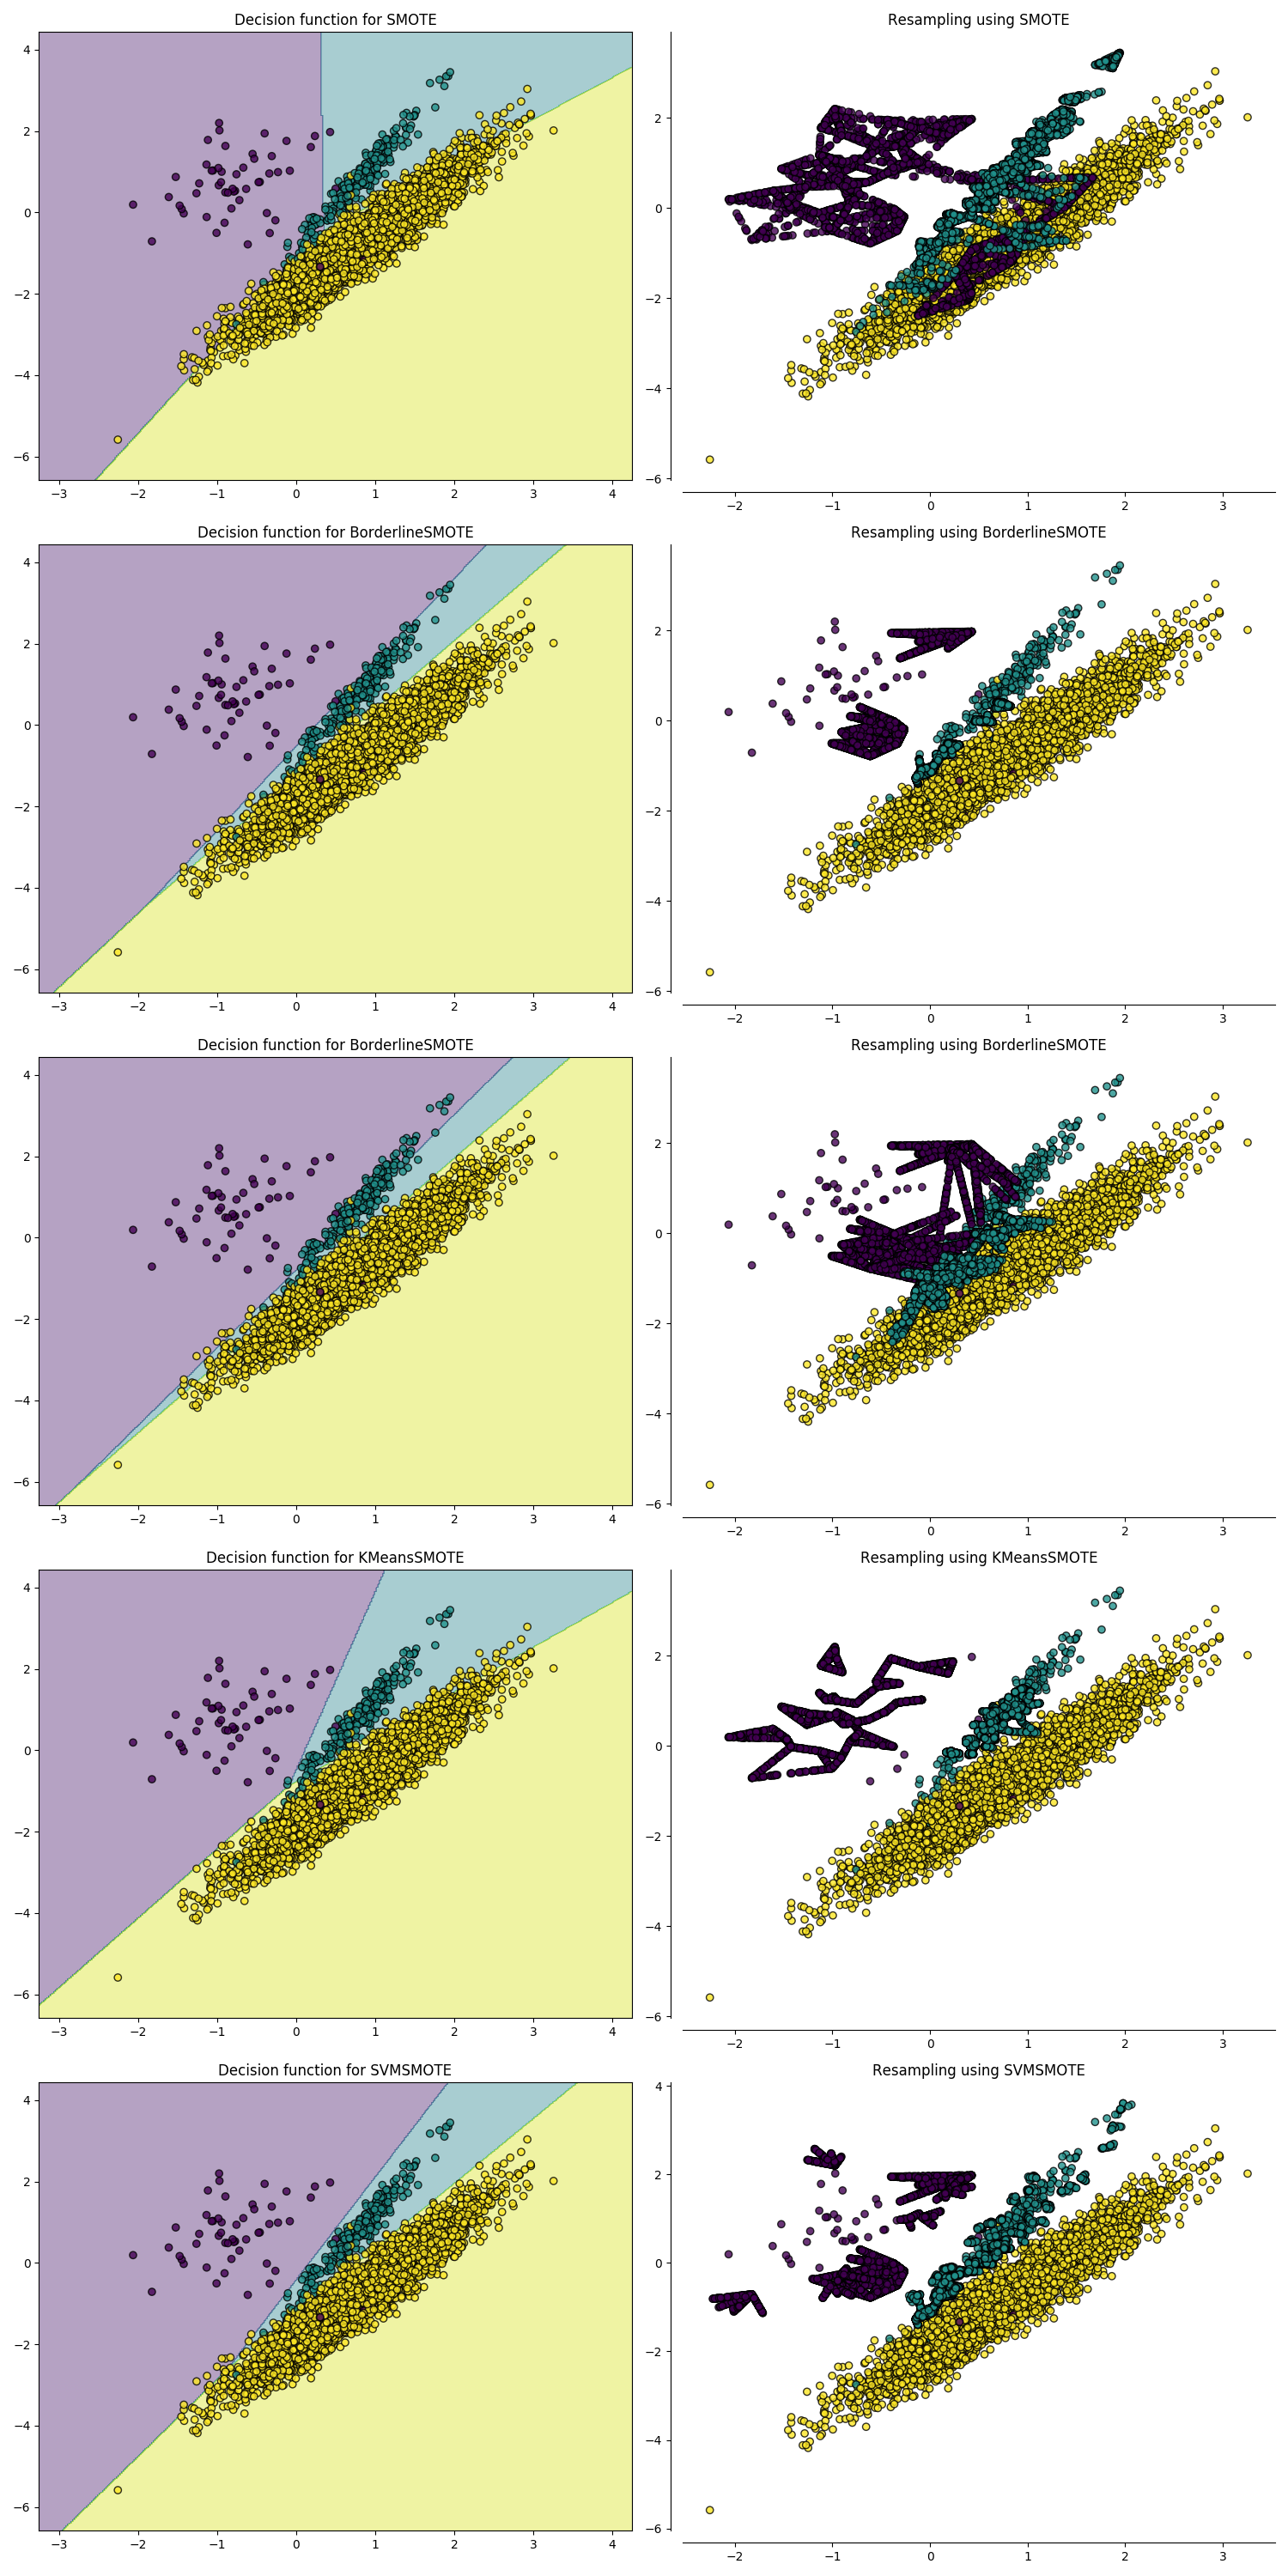

In [ ]:
!pip install imblearn --user # in windows 


In [ ]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [ ]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [ ]:
print('Original dataset shape %s' % Counter(y))

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))

Check out https://rikunert.com/SMOTE_explained for details